<a href="https://colab.research.google.com/github/DJCordhose/ml-workshop/blob/master/notebooks/unsupervised/cluster-insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/DJCordhose/ml-workshop/master/notebooks/classic/insurance-customers-1500.csv', sep=';')

In [0]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

def plot_dataset(X, y_pred=[0]):
    # last color is black to properly display label -1 as noise (black)
    colors = np.append(np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                              int(max(y_pred) + 1)))), ['#000000'])
    plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

In [0]:
X = df[['age', 'speed']].values

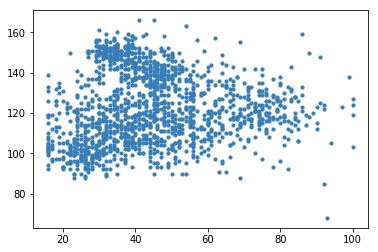

In [7]:
plot_dataset(X)

## K Means

In [8]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=3)
clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
y_pred = clf.predict(X)
y_pred

array([2, 0, 2, ..., 1, 2, 0], dtype=int32)

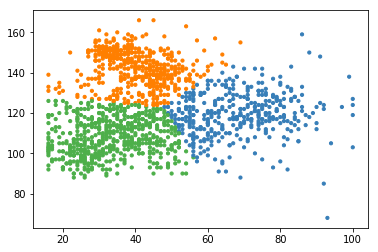

In [10]:
plot_dataset(X, y_pred)

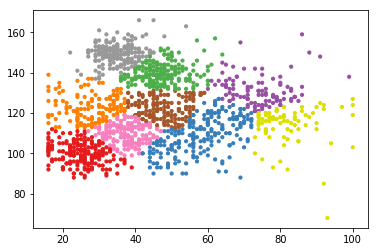

In [11]:
# from sklearn.cluster import MiniBatchKMeans
# clf = MiniBatchKMeans(n_clusters=10)

clf = KMeans(n_clusters=10)
clf.fit(X)
y_pred = clf.predict(X)
plot_dataset(X, y_pred)

## Scaling does not make a big difference for k-means

In [0]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

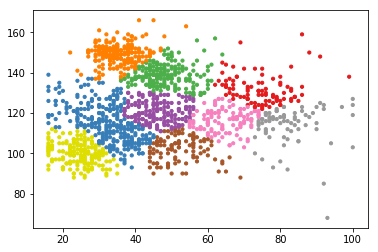

In [13]:
clf = KMeans(n_clusters=10)
clf.fit(X_scaled)
y_pred = clf.predict(X_scaled)
plot_dataset(X, y_pred)

### k-means gives us more information on clusters 

In [14]:
clf = KMeans(n_clusters=15)
clf.fit(X)
clf.cluster_centers_

array([[ 37.71126761, 108.28169014],
       [ 35.22      , 150.23      ],
       [ 59.78571429, 134.30952381],
       [ 71.63265306, 118.15306122],
       [ 43.14285714, 121.6984127 ],
       [ 22.52272727, 104.875     ],
       [ 29.24561404, 132.12280702],
       [ 45.52688172, 139.91935484],
       [ 50.20779221, 100.51948052],
       [ 78.3442623 , 131.44262295],
       [ 55.83760684, 114.26495726],
       [ 87.15789474, 116.28947368],
       [ 72.35      ,  95.65      ],
       [ 26.75824176, 118.82417582],
       [ 27.        ,  96.2173913 ]])

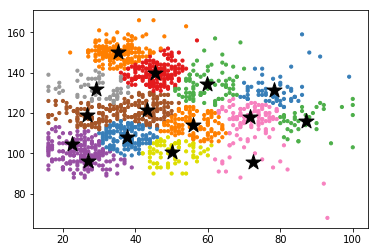

In [15]:
y_pred = clf.predict(X)

plot_dataset(X, y_pred)
plt.scatter(clf.cluster_centers_[:, [0]],
            clf.cluster_centers_[:, [1]], marker='*', s=250,
            color='black', label='Centers');

## DBSCAN 

In [0]:
from sklearn.cluster import DBSCAN

In [0]:
DBSCAN?

In [18]:
clf = DBSCAN()
clf.fit(X)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

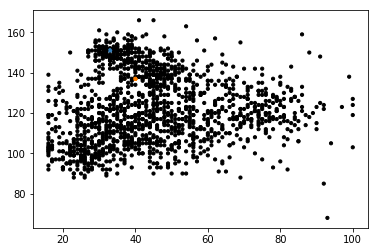

In [19]:
# black is outlier
y_pred = clf.labels_.astype(np.int)

plot_dataset(X, y_pred)

## DBSCAN is sensitive to scaling and density

* Choosing epsilon can be really handwavy
* scaling before clustering can simplify the process

In [20]:
clf = DBSCAN(eps=1.5)
clf.fit(X)

DBSCAN(algorithm='auto', eps=1.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [21]:
clf.labels_

array([-1,  0, -1, ...,  3,  1, -1])

In [22]:
unique_labels = set(clf.labels_)
len(unique_labels)

40

In [23]:
contains_noise = -1 in clf.labels_
contains_noise

True

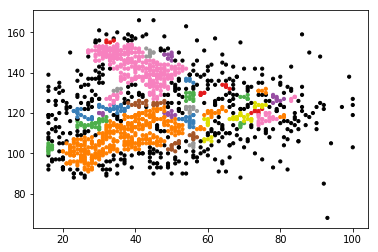

In [24]:
y_pred = clf.labels_.astype(np.int)
plot_dataset(X, y_pred)

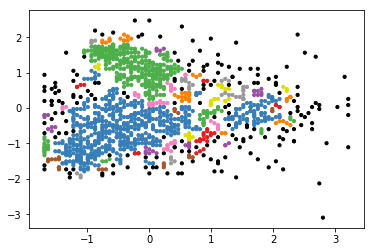

In [25]:
clf = DBSCAN(eps=0.1, min_samples=3)
clf.fit(X_scaled)
y_pred = clf.labels_.astype(np.int)
plot_dataset(X_scaled, y_pred)

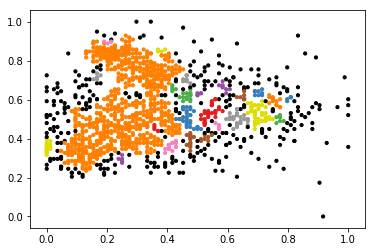

In [26]:
# https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py
from sklearn.preprocessing import MinMaxScaler

X_normalized = MinMaxScaler().fit_transform(X)
# X_normlized = Normalizer().fit_transform(X)
clf = DBSCAN(eps=.022)
clf.fit(X_normalized)
y_pred = clf.labels_.astype(np.int)
plot_dataset(X_normalized, y_pred)

# Exercise

* execute and understand the notebook up to this point
* try clustering on other combinations of features
* you can cluster on more than 2 features, it is just hard to plot more than 2
* tweak the parameters of our two clustering algorithms for good results
* Advanced: choose another clustering algorithm and try it on our data (https://scikit-learn.org/stable/modules/clustering.html)

## HDBSCAN

* no parameters at all
* like DBSCAN
* but finds out epsilon by itself

https://github.com/scikit-learn-contrib/hdbscan

https://umap-learn.readthedocs.io/en/latest/faq.html#can-i-cluster-the-results-of-umap


In [0]:
!pip install -q hdbscan

In [29]:
import hdbscan

clf = hdbscan.HDBSCAN()
y_pred = clf.fit_predict(X)
np.unique(y_pred, return_counts=True)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
        33, 34, 35, 36, 37, 38, 39, 40, 41, 42]),
 array([592,   6,   9,   5,   5,   9,  18,   6,   9,  12,   9,   5,   8,
         12,   7,  18,   8,   5,   7,  19,   5,  13,  10,   8,   9,  10,
          6,   5,   8,  19,  59,   5,   8,   5,   6,   9,  37,  23,   7,
         42, 134,  21, 275,   7]))

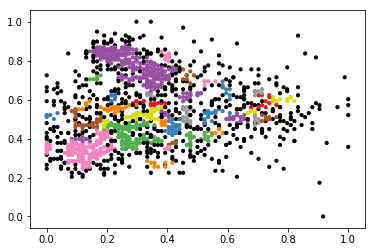

In [30]:
plot_dataset(X_normalized, y_pred)